# Project: Investigation of the noshowappointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The noshowappointments dataset holds data that may help reveal factors that affect whether a patient in Brazil would show up to a hospital appointment. 
>
> And so, in the following project, I shall be analyzing the given dataset to unveil some insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
%matplotlib inline

>**Note**: A brief explanation will be provided to clarify the process.

<a id='wrangling'></a>
# Data Wrangling

### General Properties

In [2]:
cwd = os.getcwd()
print(cwd)

C:\Users\alool


In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>**Note**: The previous cell displays the first 5 rows of the dataset, and I used it to get a general understanding of the data.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>**Note**: Next I sought to see some general statistics to get a rough idea about what to do. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>**Note**: Here I aimed to see whether there is any missing data and identify the variable types to see how I will be dealing with them.

### Data Cleaning

>**Note**: From the get go it doesn't look like there is much cleaning to do, probably just adding a new column and removing a few others. 

In [6]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["ScheduledDay"] = df["ScheduledDay"].dt.date
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df["AppointmentDay"] = df["AppointmentDay"].dt.date
df["no_of_days"] = df.AppointmentDay-df.ScheduledDay

>**Note**: Seeing that indiviually, ScheduledDay and AppointmentDay served no purpose, I thought that it might be better to have them as the difference between them, at least this gives us some useful numbers.

In [7]:
df.drop(['PatientId','AppointmentID',"ScheduledDay","AppointmentDay"], axis=1, inplace=True)

>**Note**: Dropping some useless columns.

In [8]:
df[df.Age == -1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_of_days
99832,F,-1,ROMÃO,0,0,0,0,0,0,No,0 days


In [9]:
df.drop(df[df.Age == -1].index, inplace=True)

>**Note**: There seemed to be a single row in the age coulumn with the value of -1 (which of course didn't make sense) so I thought I might as well remove it.

In [10]:
df["no_of_days"] = df["no_of_days"].dt.days

>**Note**: The format turned out a bit weird so I ended up changing it.

In [11]:
df[df.no_of_days <= -1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no_of_days
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


>**Note**: Checking to see whether there are any values that doesn't make sense; turns out there are indeed some.

In [12]:
df.drop(df[df.no_of_days <= -1].index, inplace=True)

>**Note**: Dropping those too since they are only 5, that shouldn't affect the grand scheme of things.

In [13]:
df = df.drop_duplicates()

>**Note**: Dropping the duplicates.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78256 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         78256 non-null  object
 1   Age            78256 non-null  int64 
 2   Neighbourhood  78256 non-null  object
 3   Scholarship    78256 non-null  int64 
 4   Hipertension   78256 non-null  int64 
 5   Diabetes       78256 non-null  int64 
 6   Alcoholism     78256 non-null  int64 
 7   Handcap        78256 non-null  int64 
 8   SMS_received   78256 non-null  int64 
 9   No-show        78256 non-null  object
 10  no_of_days     78256 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 7.2+ MB


>**Note**: Oh, that is many duplicates removed.
>
>With this, cleaning should be done; A bit more complicated than I thought it would be.

In [15]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_of_days
count,78256.000000,78256.000000,78256.000000,78256.000000,78256.000000,78256.000000,78256.000000,78256.000000
mean,39.096389,0.109346,0.230295,0.086358,0.031486,0.025404,0.418984,13.311465
std,22.971406,0.312075,0.421025,0.280893,0.174629,0.172978,0.493396,16.333997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


<a id='eda'></a>
# Exploratory Data Analysis



### A rough representation of the data

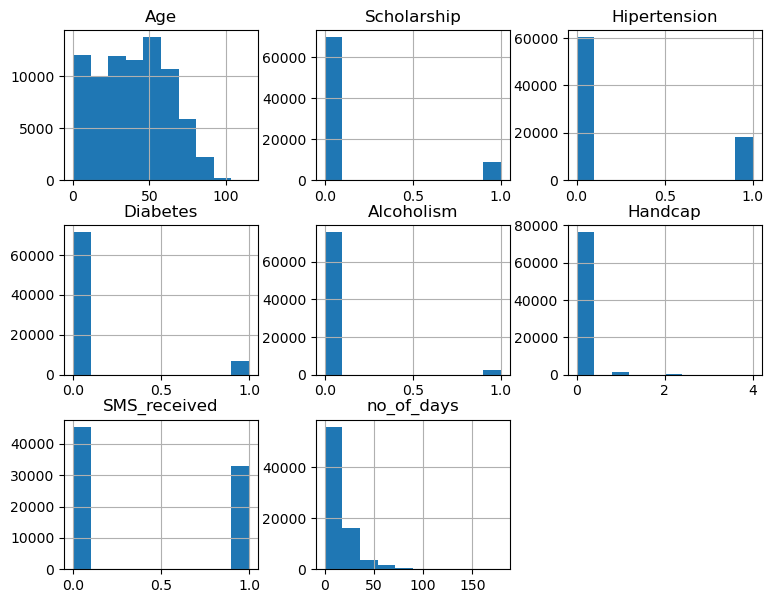

In [16]:
df.hist(figsize=(9,7));

In [17]:
df["Noshow"] = df["No-show"]
df.drop("No-show", axis=1, inplace=True)

>**Note**: A bit of additional cleaning was needed here for reasons I don't understand, it looks like there are some problems with the hyphen.

In [18]:
attended = df.Noshow == 'No'
absent = df.Noshow == 'Yes'

>**Note**: A mask to make my work easier.

### Question(1): Is there a relationship between age and attendance rate?

In [19]:
df.Age[attended].mean()

40.595034602076126

In [20]:
df.Age[absent].mean()

34.861849824012516

In [21]:
df.Age[attended].median()

42.0

In [22]:
df.Age[absent].median()

33.0

>**Note**: It looks like the average age of those who attend is around 40, and of those who didn't, around 34.  

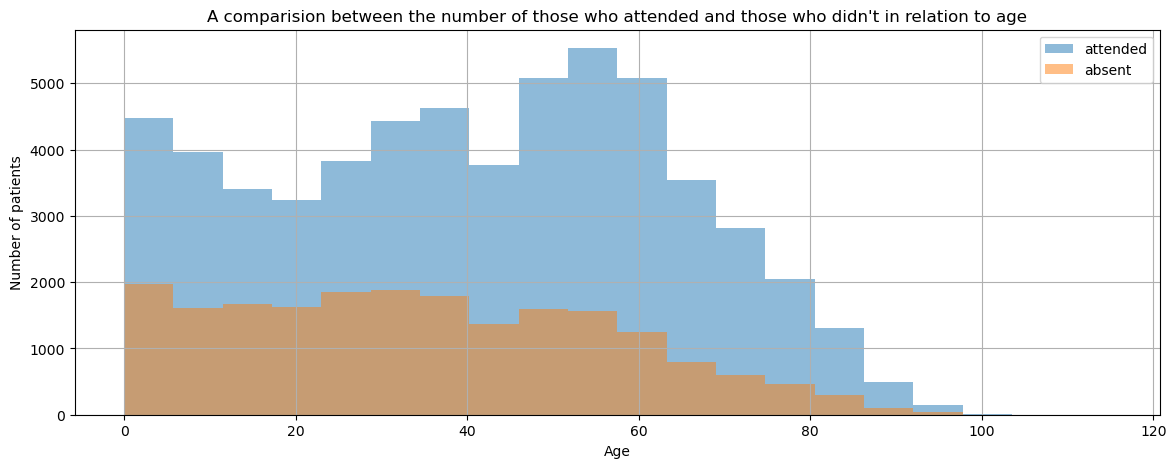

In [23]:
df.Age[attended].hist(alpha=0.5, bins=20, label='attended', figsize=(14,5));
df.Age[absent].hist(alpha=0.5, bins=20, label='absent', figsize=(14,5));
plt.legend();
plt.xlabel('Age');
plt.ylabel('Number of patients');
plt.title('A comparision between the number of those who attended and those who didn\'t in relation to age');

In [24]:
df['show'] = df['Noshow'] == 'No'

In [25]:
df['Noshow'] = df['Noshow'] == 'Yes'

In [26]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_of_days,Noshow,show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,False,True
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,False,True
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,False,True
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,False,True
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,False,True


In [27]:
df[(df.Age < 40)]['Noshow'].mean()
#Absence rate for those younger than 40

0.3074420496136641

In [28]:
df[(df.Age >= 40)]['Noshow'].mean()
#Absence rate for those older than or are 40

0.21484375

>**Note**: This is a histogram plotting a relationship between both the age and whether a patient attended the appointment. A quick look also tells us that age does appear to be a factor, apperantely those beyond the age of 40 are more likely to attend an appointment, it looks like that is the case. There may be something I am overlooking here but for now I will assume as such.

### Question(2): Does sending an sms affect the odds of attending?

In [29]:
df.SMS_received[attended].mean()
#This is the percentage of patients who recived messeges of those who attended.

0.40439446366782006

In [30]:
df.SMS_received[absent].mean()
#This is the percentage of patients who recived messeges of those who didn't attend.

0.46020727414939383

>**Note**: Oh, this is surprising and a bit counter-intuitive, from the averege it seems like those who do recieve messeges are less likely to attend?

In [31]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_of_days,Noshow,show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,False,True
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,False,True
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,False,True
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,False,True
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,False,True


In [32]:
df.groupby('SMS_received').count()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,no_of_days,Noshow,show
SMS_received,,,,,,,,,,,
0,45468,45468,45468,45468,45468,45468,45468,45468,45468,45468,45468
1,32788,32788,32788,32788,32788,32788,32788,32788,32788,32788,32788


In [33]:
df.groupby('SMS_received').mean()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,no_of_days,Noshow,show
SMS_received,,,,,,,,,
0,40.045966,0.113354,0.250858,0.098201,0.036025,0.030989,9.043767,0.242852,0.757148
1,37.779584,0.103788,0.201781,0.069934,0.025192,0.017659,19.229596,0.287117,0.712883


>**Note**: This has revealed more than I thought it would, it can be seen here that there is a relationship between the number of days to the appointment, and whether one would recieve an sms, and as with what was revealed before, chances of a paitent not attending increases when a messege is sent.

In [34]:
s = 0.242852+0.287117
arr  = np.array([0.242852/s,0.287117/s])

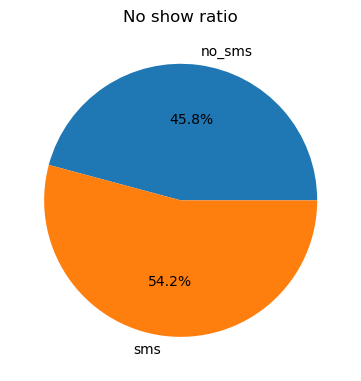

In [35]:
labels = 'no_sms','sms'
plt.figure(figsize=(6, 3.7), layout='constrained')
plt.pie(arr, labels=labels, autopct='%1.1f%%')
plt.title("No show ratio");

>**Note**: It looks like there is indeed an inverse relationship between sms and patients attending, but again not a big one, this is quite weird I would say. Then again, this is also not completely certain as there might be other variables in play.

In [36]:
df.query('Gender == "M"')['SMS_received'].mean(),df.query('Gender == "F"')['SMS_received'].mean()

(0.3904631547795206, 0.4340348274246447)

>**Note**: Thought it might be interesting to see if there is any relationship between gender and receving an sms, and a rough look tells us that there is some. 

### Question(3): Does the time interval between the scheduling day and the appointment day have any infleuance on whether a patient would attend?

In [37]:
df.no_of_days[attended].mean()

12.231920415224913

In [38]:
df.no_of_days[absent].mean()

16.36180093859992

In [39]:
df.no_of_days[attended].median()

6.0

In [40]:
df.no_of_days[absent].median()

12.0

>**Note**: People are forgetful indeed, it looks like there might be a correlation between time intervals and absence.

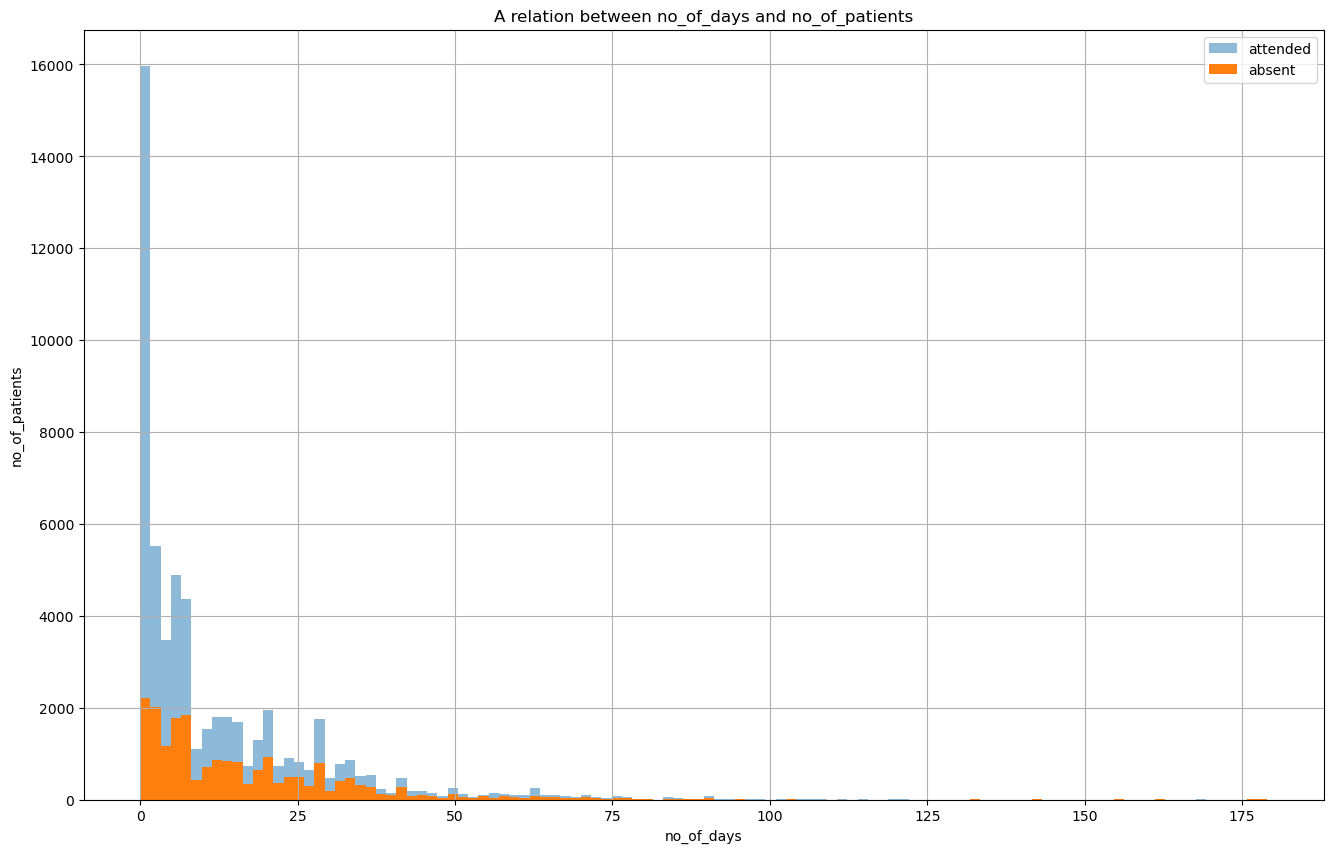

In [41]:
df.no_of_days[attended].hist(alpha=0.5, figsize=(16, 10), bins=110, label='attended');
df.no_of_days[absent].hist(alpha=1, figsize=(16, 10), bins=110, label='absent');
plt.legend();
plt.xlabel('no_of_days');
plt.ylabel('no_of_patients');
plt.title('A relation between no_of_days and no_of_patients');

In [42]:
table = pd.pivot_table(df, index=['no_of_days', 'show'], aggfunc='size')

In [43]:
table = table.reset_index()

In [44]:
table['count'] = table[0]

In [45]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   no_of_days  235 non-null    int64
 1   show        235 non-null    bool 
 2   0           235 non-null    int64
 3   count       235 non-null    int64
dtypes: bool(1), int64(3)
memory usage: 5.9 KB


In [46]:
table.head()

,no_of_days,show,0,count
0,0,False,1216,1216
1,0,True,12764,12764
2,1,False,999,999
3,1,True,3195,3195
4,2,False,1414,1414


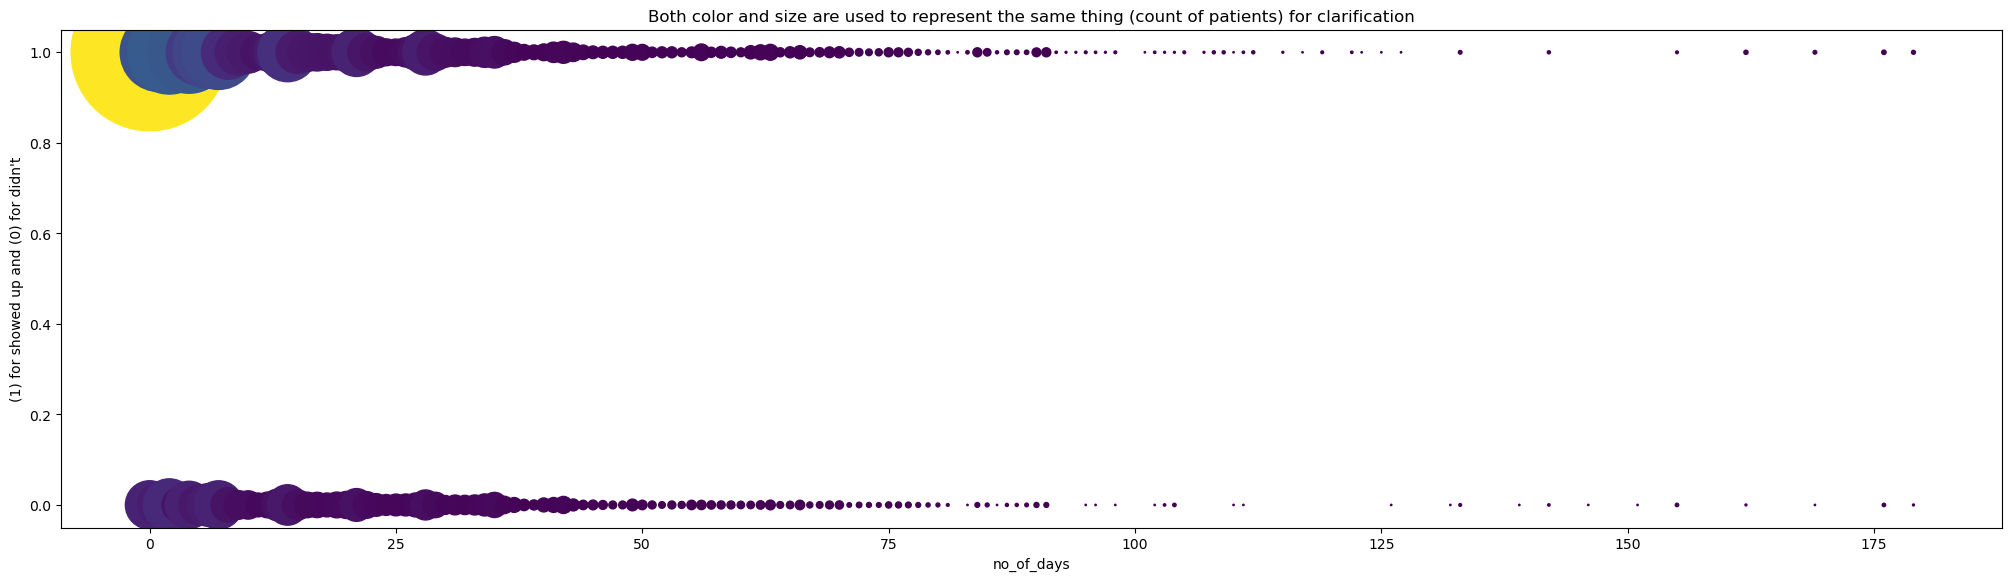

In [47]:
fig, ax = plt.subplots(figsize=(20, 5.7), layout='constrained')
ax.scatter('no_of_days', 'show', s='count', c='count', data=table);
plt.xlabel('no_of_days');
plt.ylabel('(1) for showed up and (0) for didn\'t');
plt.title('Both color and size are used to represent the same thing (count of patients) for clarification');

>**Note**: This is crooked, it looks like I need to think of another way.

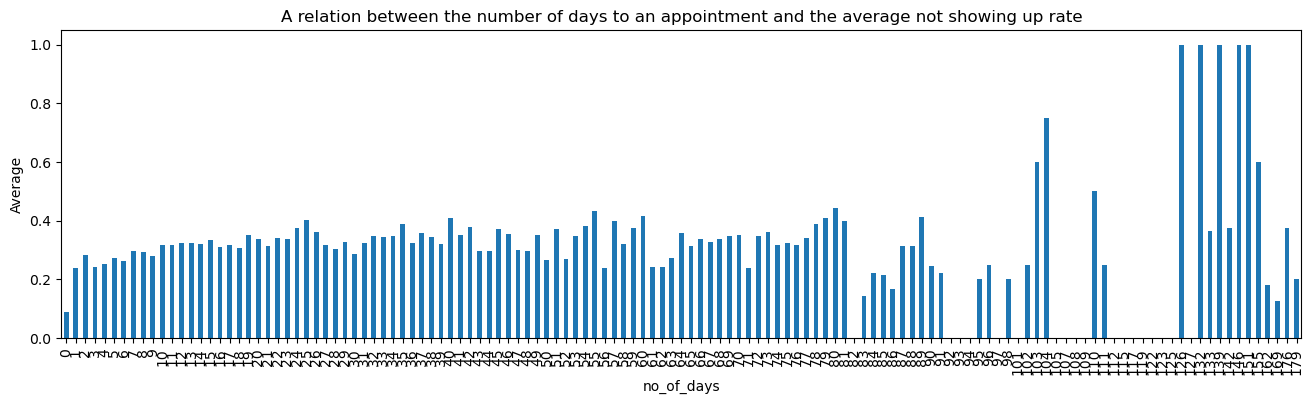

In [48]:
df.groupby('no_of_days').Noshow.mean().plot(kind='bar', figsize=(16,4)).set_title("A relation between the number of days to an appointment and the average not showing up rate")
plt.ylabel('Average');

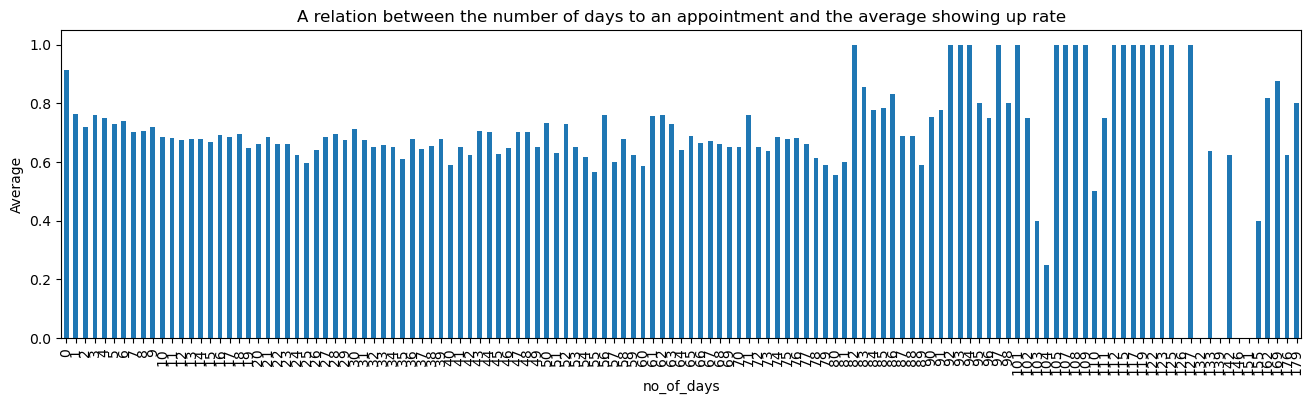

In [49]:
df.groupby('no_of_days').show.mean().plot(kind='bar', figsize=(16,4)).set_title("A relation between the number of days to an appointment and the average showing up rate")
plt.ylabel('Average');

>**Note**: It looks like time has a bit of significance, but the problem is that it is unfair to compare the beginning to the end due to the huge difference in count.  

<a id='conclusions'></a>
## Conclusions

Finally, and without further ado, my findings are as follows:

>1. There seems to be some relationship between the age of the patients and whether they would attend; those beyond the age of 40 seemed more likely to attend, which may be due to the nature of their illness or simply their mental maturity, and of course I didn't take into account any other variable that may likely affect the results, such as whether that patient has a job, family, etc. So, there is room for error.
>

>2. There seems to be an inverse relationship between receiving an SMS and attending an appointment; it's not a big one, though. Maybe in Brazil, receiving an SMS from a hospital has some negative implications that lead to such behavior? I am not sure, but as with the previous conclusion, I didn't take any other factor into account, and this may affect the accuracy of the results. Also, there seems to be some correlation between gender and receiving an SMS; females look like they are a bit more likely to receive one; maybe it is due to them being mothers?
>

>3. The time interval between scheduling an appointment and the day of the appointment itself also seems to be another factor that results in patients not showing up, but that is more true when we compare same-day appointments to others, and as with the previous results, these results are not that accurate.